In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from IPython.display import display # データフレーム表示用関数
import seaborn as sns
import pymc as pm
import arviz as az
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode="fixed")
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams["figure.figsize"] = (6, 6)
# 方眼表示ON
plt.rcParams["axes.grid"] = True
# データフレームでの表示精度
pd.options.display.float_format = "{:.3f}".format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## ベルヌーイ分布（`pm.Bernoulli`クラス）

In [2]:
# Code 2.1 ベルヌーイ分布の確率モデル定義（p=0.5）

# パラメータ設定
p = 0.5

model1 = pm.Model()
with model1:
    # pm.Bernoulli: ベルヌーイ分布
    # p: くじに当たる確率
    x = pm.Bernoulli("x", p=p)

In [3]:
# Code 2.2 事前分布のサンプリング

with model1:
    prior_samples1 = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


In [4]:
# Code 2.3 サンプル値を NumPy 形式で抽出

x_samples1 = prior_samples1["prior"]["x"].values
print(x_samples1)

[[1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
  0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
  0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
  1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
  0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1
  1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0
  1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
  0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
  1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
  0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 

In [5]:
# Code 2.4 サンプリング結果の統計分析

summary1 = az.summary(prior_samples1, kind="stats")
display(summary1)

,mean,sd,hdi_3%,hdi_97%
x,0.512,0.500,0.000,1.000


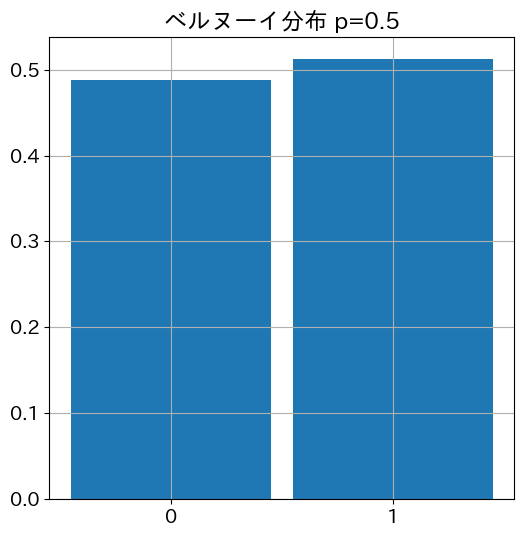

In [6]:
# Code 2.5 サンプリング結果の可視化

ax = az.plot_dist(x_samples1)
ax.set_title(f"ベルヌーイ分布 p={p}");

## 二項分布（`pm.Binomial`クラス）

In [7]:
# Code 2.6 二項分布の確率モデル定義（p=0.5, n=5）

# パラメータ設定
p = 0.5
n = 5

model2 = pm.Model()
with model2:
    # pm.Binomial: 二項分布
    # p: くじに当たる確率
    # n: 試行回数
    x = pm.Binomial("x", p=p, n=n)

Sampling: [x]


[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0 4 4 2 2 1 4
  1 3 2 0 0 3 2 2 3 3 4 4 2 1 2 3 2 2 

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


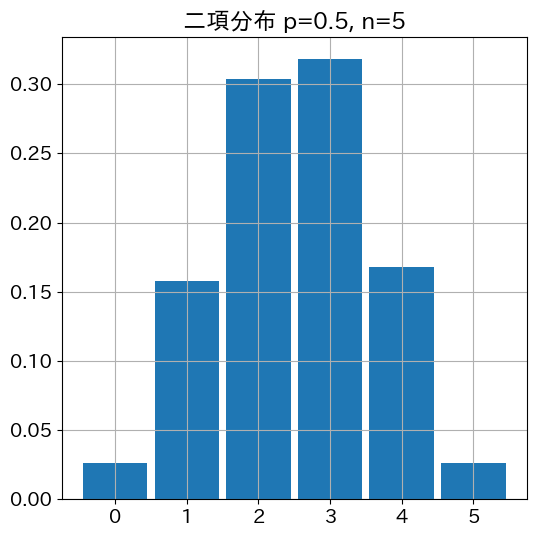

In [8]:
# Code 2.7 事前分布のサンプリングと結果分析

with model2:
    # sampling
    prior_samples2 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples2 = prior_samples2["prior"]["x"].values
print(x_samples2)

# サンプリング結果の統計分析
summary2 = az.summary(prior_samples2, kind="stats")
display(summary2)

# サンプリング結果の可視化
ax = az.plot_dist(x_samples2)
ax.set_title(f"二項分布 p={p}, n={n}");

Sampling: [x]


,mean,sd,hdi_3%,hdi_97%
x,24.998,3.456,18.000,30.000


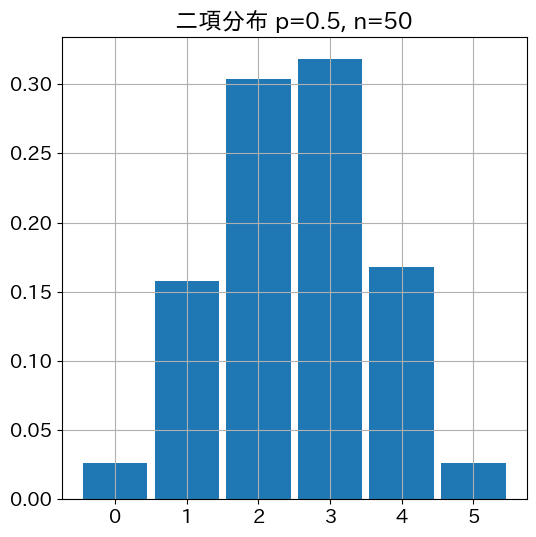

In [9]:
# Code 2.8 二項分布の確率モデル定義（p=0.5, n=50）

model3 = pm.Model()

with model3:
    x = pm.Binomial("x", p=0.5, n=50)

    prior_samples3 = pm.sample_prior_predictive(random_seed=42)

x_samples3 = prior_samples3["prior"]["x"].values

summary3 = az.summary(prior_samples3, kind="stats")
display(summary3)

ax = az.plot_dist(x_samples2)
ax.set_title(f"二項分布 p=0.5, n=50");

## 正規分布（`pm.Normal`クラス）

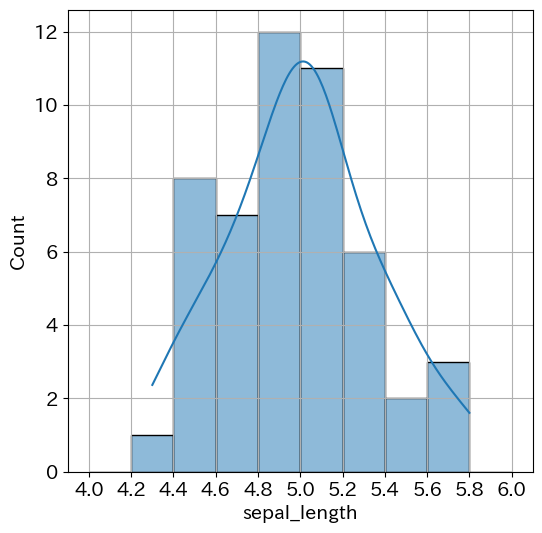

In [10]:
# Code 2.9 アイリス・データセットから、setosa のがく片長の分布を調べる

# データセットの読み込み
df = sns.load_dataset("iris")

# 種類が setosa の行のみ抽出
df1 = df.query('species == "setosa"')

bins = np.arange(4.0, 6.2, 0.2)
sns.histplot(data=df1, x="sepal_length", bins=bins, kde=True)
plt.xticks(bins);


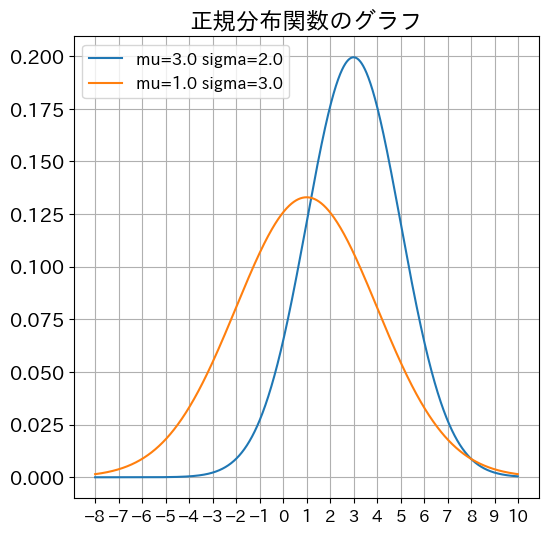

In [11]:
# Code 2.10 正規分布関数の定義とグラフ描画

def norm(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2) / (np.sqrt(2 * np.pi) * sigma)

# パラメータ定義
mu1, sigma1 = 3.0, 2.0
mu2, sigma2 = 1.0, 3.0

# グラフ描画用x座標の定義
# 2つの正規分布関数で±3sigmaまで入るように計算
x = np.arange(-8.0, 10.0, 0.01)

# x軸目盛の設定
xticks = np.arange(-8.0, 11.0, 1.0)

# グラフ描画
plt.plot(x, norm(x, mu1, sigma1), label=f"mu={mu1} sigma={sigma1}")
plt.plot(x, norm(x, mu2, sigma2), label=f"mu={mu2} sigma={sigma2}")
plt.xticks(xticks, fontsize=12)
plt.legend(fontsize=12)
plt.title("正規分布関数のグラフ");

In [12]:
# Code 2.11 正規分布の確率モデル定義（mu=0, sigma=1.0）

# パラメータ設定
mu = 0
sigma = 1.0

model4 = pm.Model()
with model4:
    # pm.Normal: 正規分布
    # mu:平均
    # sigma:標準偏差
    x = pm.Normal("x", mu=mu, sigma=sigma)

Sampling: [x]


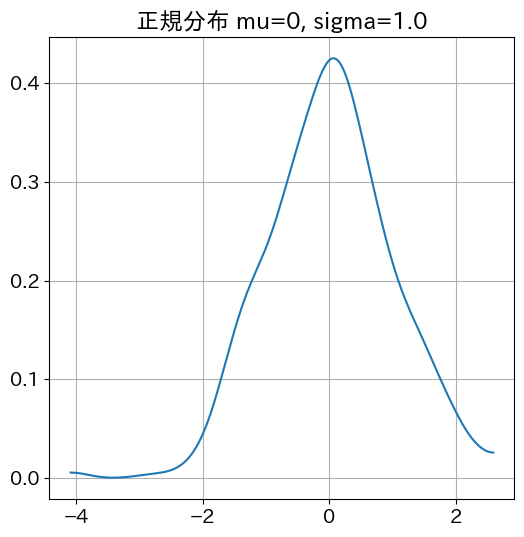

In [13]:
# Code 2.12 サンプリングとサンプリング結果の分析

with model4:
    prior_samples4 = pm.sample_prior_predictive(random_seed=42)

# サンプル値の抽出
x_samples4 = prior_samples4["prior"]["x"].values

# サンプリング結果の可視化
ax = az.plot_dist(x_samples4)
ax.set_title(f"正規分布 mu={mu}, sigma={sigma}");

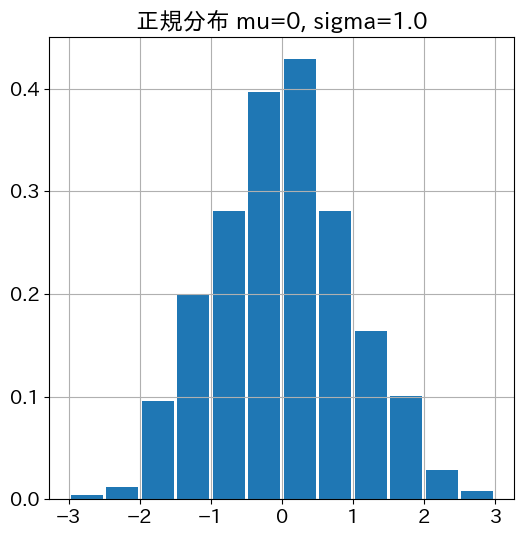

In [14]:
# Code 2.13 サンプリング結果のヒストグラム表示

bins = np.arange(-3,3.5,0.5)
ax = az.plot_dist(x_samples4, kind="hist",hist_kwargs={"bins":bins})
plt.xticks(np.arange(-3,4,1))
ax.set_title(f"正規分布 mu={mu}, sigma={sigma}");

In [15]:
# Code 2.14 サンプリング結果の統計分析

summary4 = az.summary(prior_samples4, kind="stats")
display(summary4)

,mean,sd,hdi_3%,hdi_97%
x,0.009,0.963,-1.590,1.900


Sampling: [x]


,mean,sd,hdi_3%,hdi_97%
x,3.018,1.927,-0.180,6.801


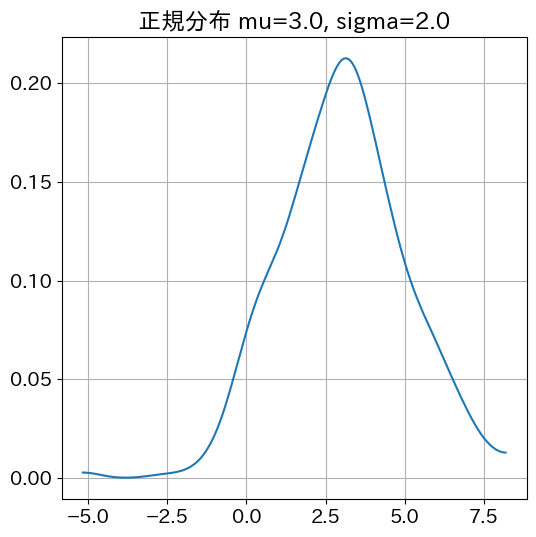

In [16]:
# Code 2.15 正規分布の確率モデル定義（mu=3.0, sigma=2.0）とサンプリング結果分析

# パラメータ設定
mu = 3.0
sigma = 2.0

model5 = pm.Model()
with model5:
    # pm.Normal: 正規分布
    # mu:平均
    # sigma:標準偏差
    x = pm.Normal("x", mu=mu, sigma=sigma)

    # サンプリング
    prior_samples5 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples5 = prior_samples5["prior"]["x"].values

# サンプリング結果の統計分析
summary5 = az.summary(prior_samples5, kind="stats")
display(summary5)

# サンプリング結果の可視化
ax = az.plot_dist(x_samples5)
ax.set_title(f"正規分布 mu={mu}, sigma={sigma}");

## 一様分布（`pm.Uniform`クラス）

In [17]:
# Code 2.16 一様分布の確率モデル定義

# パラメータ設定
lower = 0.0
upper = 1.0

model6 = pm.Model()
with model6:
    # pm.Uniform: 一様分布
    # lower: 下限値
    # upper: 上限値
    x = pm.Uniform("x", lower=lower, upper=upper)

Sampling: [x]


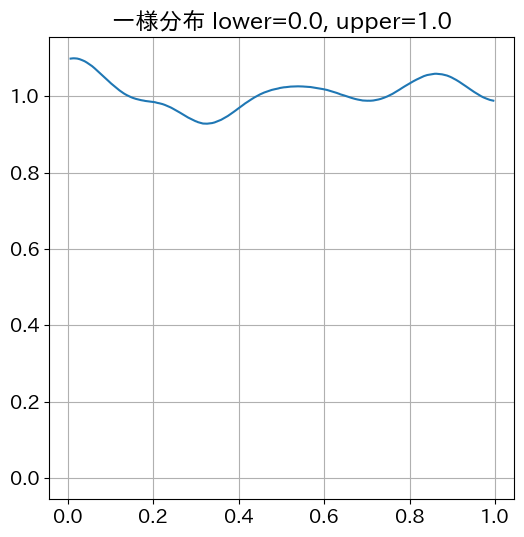

In [18]:
# Code 2.17 一様分布のサンプリングと結果分析

with model6:
    prior_samples6 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples6 = prior_samples6["prior"]["x"].values

# サンプリング結果の可視化
ax = az.plot_dist(x_samples6)
ax.set_title(f"一様分布 lower={lower}, upper={upper}");

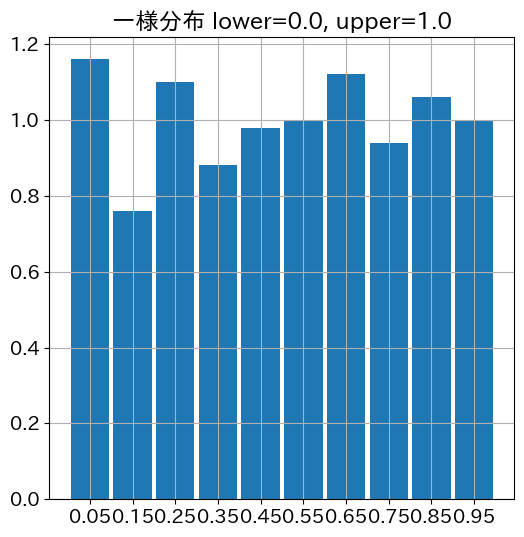

In [19]:
# Code 2.18 サンプリング結果のヒストグラム表示

bins = np.arange(0.0,1.1,0.1)
ax = az.plot_dist(x_samples6, kind="hist",
    hist_kwargs={"bins":bins})
ax.set_title(f"一様分布 lower={lower}, upper={upper}");

In [20]:
# Code 2.19 サンプリング結果の統計分析

summary6 = az.summary(prior_samples6, kind="stats")
display(summary6)

,mean,sd,hdi_3%,hdi_97%
x,0.502,0.289,0.037,0.956


Sampling: [x]


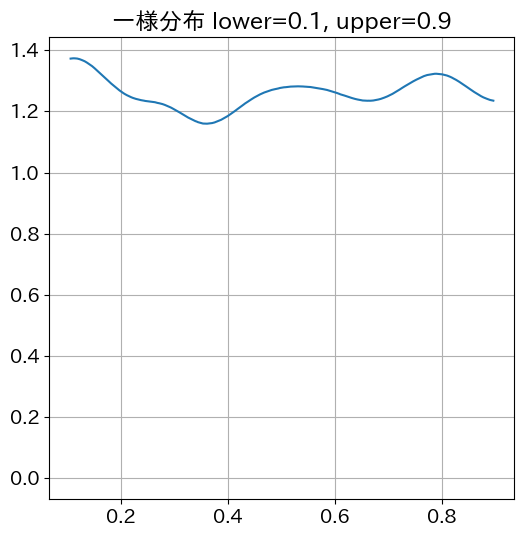

In [21]:
# Code 2.20 一様分布の確率モデル定義（下限値0.1, 上限値0.9）とサンプリング結果分析

# パラメータ設定
lower = 0.1
upper = 0.9

model7 = pm.Model()
with model7:
    # pm.Uniform: 一様分布
    # lower: 下限値
    # upper: 上限値
    x = pm.Uniform("x", lower=lower, upper=upper)

    # サンプリング
    prior_samples7 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples7 = prior_samples7["prior"]["x"].values

# サンプリング結果の可視化
ax = az.plot_dist(x_samples7)
ax.set_title(f"一様分布 lower={lower}, upper={upper}");

## ベータ分布（`pm.Beta`クラス）

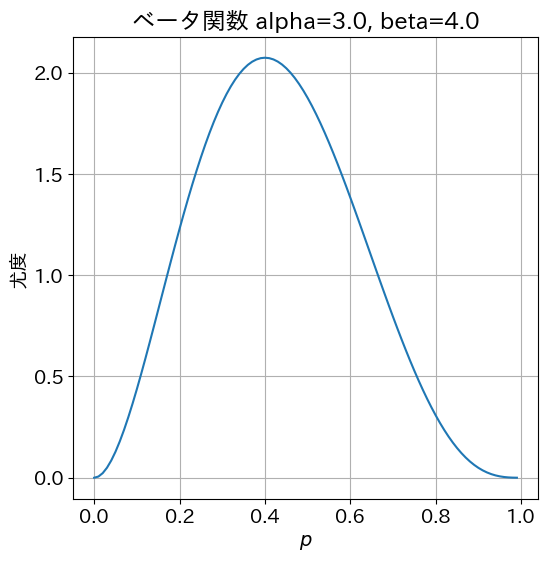

In [22]:
# Code 2.21 ベータ関数グラフの描画

from math import gamma
# パラメータ設定
alpha = 2.0 + 1.0
beta = 3.0 + 1.0

# ベータ関数の定義
def Beta(p, alpha, beta):
    C = gamma(alpha+beta-1) / (gamma(alpha-1)*gamma(beta-1))
    return C * p**(alpha-1) * (1-p)**(beta-1)

# 定義域: 0.0 < p < 1.0
p = np.arange(0.0, 1.0, 0.01)

# 描画
plt.plot(p, Beta(p, alpha, beta))
plt.title(f"ベータ関数 alpha={alpha}, beta={beta}")
plt.xlabel(r"$p$")
plt.ylabel("尤度");

In [23]:
# Code 2.22 ベータ分布の確率モデル定義（alpha=3, beta=4）

# パラメータ設定
alpha = 2.0 + 1.0
beta = 3.0 + 1.0

model8 = pm.Model()
with model8:
    # pm.Beta: ベータ分布
    # alpha:くじに当たった回数+1
    # beta:くじにはずれた回数+1
    p = pm.Beta("p", alpha=alpha, beta=beta)

Sampling: [p]


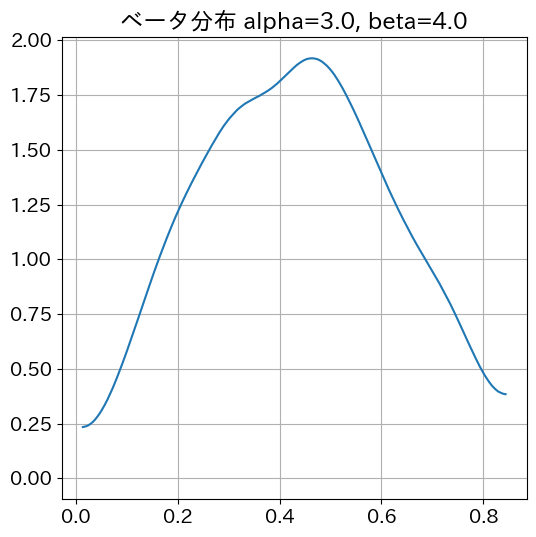

In [24]:
# Code 2.23 サンプリングと結果分析

with model8:
    prior_samples8 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
p_sample8 = prior_samples8["prior"]["p"].values

# サンプリング結果の可視化
ax = az.plot_dist(p_sample8)
ax.set_title(f"ベータ分布 alpha={alpha}, beta={beta}");

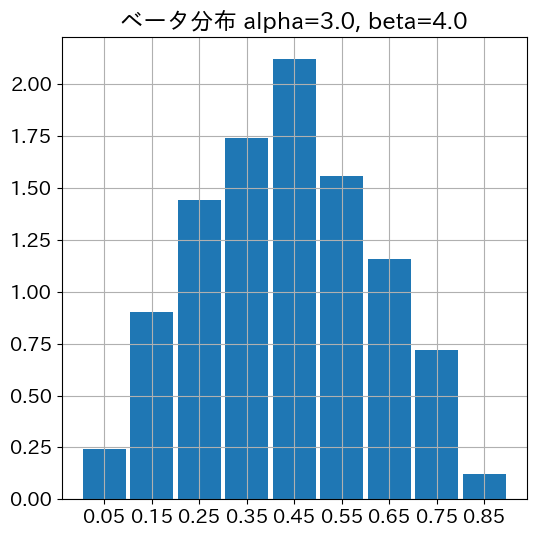

In [25]:
# Code 2.24 サンプルデータのヒストグラム表示

bins = np.arange(0, 1.0, 0.1)
ax = az.plot_dist(p_sample8, kind="hist", hist_kwargs={"bins":bins})
ax.set_title(f"ベータ分布 alpha={alpha}, beta={beta}");

In [26]:
# Code 2.25 サンプリング結果の統計分析

summary8 = az.summary(prior_samples8, kind="stats")
display(summary8)

,mean,sd,hdi_3%,hdi_97%
p,0.433,0.181,0.120,0.760


Sampling: [p]


,mean,sd,hdi_3%,hdi_97%
p,0.403,0.068,0.281,0.534


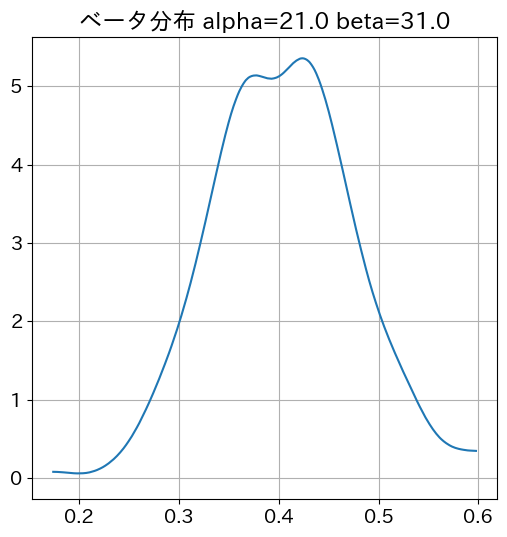

In [27]:
# Code 2.22 ベータ分布の確率モデル定義（alpha=21, beta=31）

# パラメータ設定
alpha = 20.0 + 1.0
beta = 30.0 + 1.0

model9 = pm.Model()
with model9:
    # pm.Beta: ベータ分布
    # alpha: 注目している試行の成功数+1
    # beta: 注目している試行の失敗数+1
    p = pm.Beta("p", alpha=alpha, beta=beta)

    # サンプリング
    prior_samples9 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
p_samples9 = prior_samples9["prior"]["p"].values

# サンプリング結果の統計分析
summary9 = az.summary(prior_samples9, kind="stats")
display(summary9)

# サンプリング結果の可視化
ax = az.plot_dist(p_samples9)
ax.set_title(f"ベータ分布 alpha={alpha} beta={beta}");

## 半正規分布（`pm.HalfNormal`クラス）
確率密度関数：
$$
f(x) = \sqrt{\frac{2}{\pi\sigma^2}}\exp{\left(-\frac{x^2}{2\sigma^2}\right)}
$$

In [28]:
# Code 2.27 半正規分布の確率モデル定義（sigma=1.0）

# パラメータ設定
sigma = 1.0

model10 = pm.Model()
with model10:
    # pm.HalfNormal: 半正規分布
    # sigma: 標準偏差
    x = pm.HalfNormal("x", sigma=sigma)

Sampling: [x]


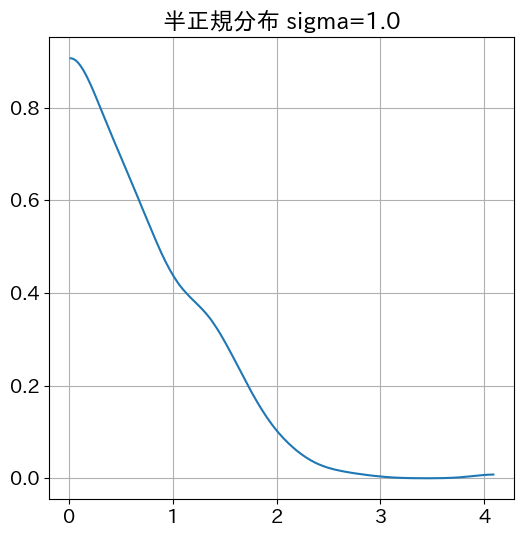

In [29]:
# Code 2.28 サンプリングと結果分析

with model10:
    prior_samples10 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples10 = prior_samples10["prior"]["x"].values

# サンプリング結果の可視化
ax = az.plot_dist(x_samples10)
ax.set_title(f"半正規分布 sigma={sigma}");

## コラム：Column HDI (highest density interval) と CI (confidence interval) の違い

In [30]:
## CIグラフ描画の準備
# カイ2乗分布(nu=3)の確率密度関数
def qui_square(x):
    w = x / (2*np.pi)
    return np.sqrt(w) * np.exp(-x/2)

# x1, x2はa1, a2の値が0.1になるようにヒューリスティックに求めた
x1 = 0.585
x2 = 6.25

# 数値積分でグラフの面積を計算
from scipy import integrate
a1, _err1 = integrate.quad(qui_square, 0, x1)
a2, _err2 = integrate.quad(qui_square, x2, 1000)
a = np.array([a1, a2])
print(a)

[0.100 0.100]


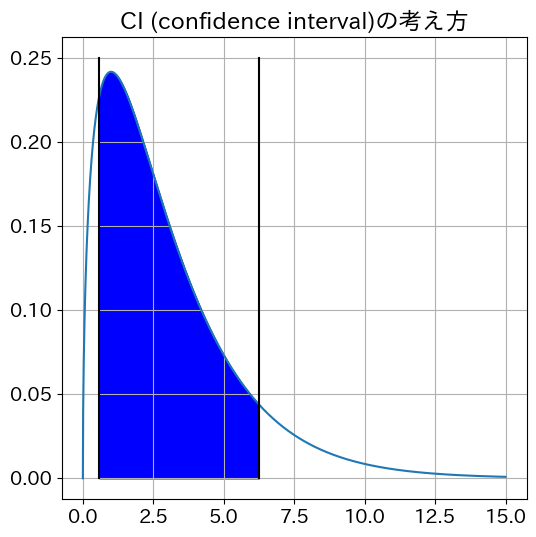

In [31]:
## CIグラフの描画
x = np.arange(0.0, 15, 0.01)
x_between = (x1 < x) & (x  < x2)
y = qui_square(x)
plt.plot(x, y)
plt.fill_between(x, 0, y, where=x_between, color="b")
plt.plot((x1, x1), (0, 0.25), c="k")
plt.plot((x2, x2), (0, 0.25), c="k")
plt.title("CI (confidence interval)の考え方");

In [32]:
## HDIグラフ描画の準備

from scipy import optimize

def h(x):
    return qui_square(x) - 0.05

print(optimize.fsolve(h, 0.0))
print(optimize.fsolve(h, 5.0))

[0.016]
[5.934]


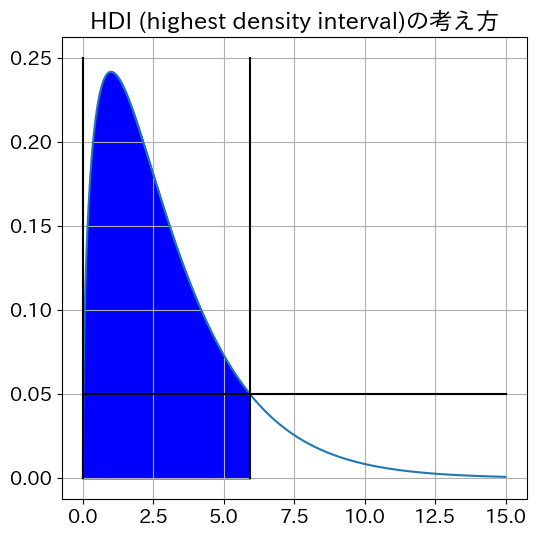

In [33]:
## HDIグラフの描画
x = np.arange(0.0, 15, 0.01)
x1 = 0.02
x2 = 5.93
y = qui_square(x)
plt.plot(x, y)
plt.fill_between(x, 0.0, y, where= np.logical_and(x > x1, x < x2), color="b")
plt.plot((0, 15.0), (0.05, 0.05), c="k")
plt.plot((x1, x1), (0, 0.25), c="k")
plt.plot((x2, x2), (0, 0.25), c="k")
plt.title("HDI (highest density interval)の考え方");